In [17]:
!pip install replicate
!pip install langchain_community

In [18]:
from google.colab import userdata
import os

api_token = userdata.get("api_token")
os.environ["REPLICATE_API_TOKEN"] = api_token

In [19]:
from langchain_community.llms import Replicate

llm = Replicate(model="ibm-granite/granite-3.3-8b-instruct")
model_kwargs={"temperature": 0.1}

In [20]:
data = [
    "My ping is stable at 20ms but I'm still getting the 'Network Problem' icon and my shots aren't registering. It's unplayable.",
    "Ever since the new patch, I'm getting constant packet loss warnings even with stable internet. It makes peek-fights completely random.",
    "On the new map Lotus, I was rotating through B site and got permanently stuck between the wall and the stairs. Had to wait for the round to end.",
    "On the map Sunset, Sova's drone can still see through a wall near A site. This is a known exploit and it's completely unfair.",
    "Ever since the new patch, Phoenix's curveball flash sometimes goes right through enemies without blinding them. It's completely unreliable now.",
    "Clove's ultimate 'Not Dead Yet' is bugged. Sometimes after reviving, I'm stuck and can't shoot or use any abilities for a few seconds.",
    "After the last update, my friends list shows everyone as offline even when they're in a match. I have to restart the client to invite them.",
    "The friends list keeps showing everyone as offline when they aren't, and I have to restart the client multiple times to invite them to my party.",
    "Twice last night, I tried to plant the spike and the animation started but it just wouldn't stick to the ground. We lost the round because of it.",
    "Hit registration feels completely broken this patch. My crosshair was on their head, I fired, but the server registered no damage.",
    "The Riot Client gets stuck on a black screen half the time I launch it. I have to use task manager to kill it and try again 3-4 times."
    "Half the time the Riot Client gets stuck on a loading screen and I have to end the task and restart my whole PC just to launch Valorant."
]

In [21]:
for row in data:
  print("Input Ulasan : ", row)

  prompt = f"""
YYou are a famous and highly critical game reviewer known for your sharp analysis of game-breaking issues.
Your task is to analyze the following Valorant bug report and classify its severity based on its impact.

### Bug Impact Categories:
- **Minor Bug**: Visual or audio glitches that don't affect gameplay.
- **Annoying Bug**: Bugs that are frustrating but don't prevent playing (e.g., UI, lobby issues).
- **Player-Disadvantage Bug**: Directly causes a player to lose a fight or die unfairly (e.g., hit registration, ability failure).
- **Game-Breaking Bug**: Makes the game unplayable (e.g., constant crashes, unable to move or shoot).
- **Exploit Bug**: Gives a player an unfair advantage over others (e.g., seeing through walls).

### Reviewer's Task:
Analyze the bug report below. First, state your "Reviewer's Verdict" using one of the categories above. Then, write "The Breakdown" explaining the problem and its impact in one sentence.

---
### Example 1
**Bug Report**: "On the map Sunset, Sova's drone can still see through a wall near A site."
**Analysis Output**:
Reviewer's Verdict: Exploit Bug
The Breakdown: This is a classic exploit that gives the Sova player unfair information, completely compromising the integrity of the site hold.

### Example 2
**Bug Report**: "Hit registration feels completely broken this patch. My crosshair was on their head, I fired, but the server registered no damage."
**Analysis Output**:
Reviewer's Verdict: Player-Disadvantage Bug
The Breakdown: This hit registration issue directly causes players to lose gunfights they should have won, making the core gameplay feel unreliable.
---

### Bug Report to Analyze
**Bug Report**: "{row}"
**Analysis Output**:
  """
  print("================================================================================")
  print("Prompt Sekarang : ", prompt)
  output = llm.invoke(prompt)
  print("Output Sekarang : ", output)
  print("================================================================================")

Input Ulasan :  My ping is stable at 20ms but I'm still getting the 'Network Problem' icon and my shots aren't registering. It's unplayable.
Prompt Sekarang :  
YYou are a famous and highly critical game reviewer known for your sharp analysis of game-breaking issues.
Your task is to analyze the following Valorant bug report and classify its severity based on its impact.

### Bug Impact Categories:
- **Minor Bug**: Visual or audio glitches that don't affect gameplay.
- **Annoying Bug**: Bugs that are frustrating but don't prevent playing (e.g., UI, lobby issues).
- **Player-Disadvantage Bug**: Directly causes a player to lose a fight or die unfairly (e.g., hit registration, ability failure).
- **Game-Breaking Bug**: Makes the game unplayable (e.g., constant crashes, unable to move or shoot).
- **Exploit Bug**: Gives a player an unfair advantage over others (e.g., seeing through walls).

### Reviewer's Task:
Analyze the bug report below. First, state your "Reviewer's Verdict" using one o

In [22]:
!pip install pandas
!pip install -U langchain_community langchain_experimental replicate

In [23]:
import pandas as pd

import zipfile

zip_file_path = 'valorant.zip'

try:
    with zipfile.ZipFile(zip_file_path, 'r') as z:
        file_name_inside_zip = z.namelist()[0]
        z.extractall()
        print(f"✅ File berhasil diekstrak: {file_name_inside_zip}")

    if file_name_inside_zip.endswith('.csv'):
        df = pd.read_csv(file_name_inside_zip)
    elif file_name_inside_zip.endswith('.parquet'):
        !pip install pyarrow
        df = pd.read_parquet(file_name_inside_zip)

    print("\n DataFrame berhasil dimuat.")
    print(df.head())

except FileNotFoundError:
    print(f" Error: File '{zip_file_path}' tidak ditemukan. Pastikan sudah diunggah.")
except Exception as e:
    print(f" Terjadi kesalahan: {e}")

✅ File berhasil diekstrak: user_reviews.parquet

✅ DataFrame berhasil dimuat.
     username review_type published_date score votes  \
0  Xalencelph        user   Jun 11, 2020     2     0   
1   DrPiipocO        user   Jun 11, 2020     9     0   
2    Mirzahan        user   Jun 11, 2020     2     0   
3     Uncleho        user   Jun 11, 2020     8     1   
4  rpzdylilim        user   Jun 11, 2020     2     1   

                                         review_text  \
0  A good game to play if you like CS GO.\r<br/>E...   
1  Muito bom porém não gostei muito dos mapas poi...   
2  I was expecting much more at the begin because...   
3  Good FPS game and i really like the cartoon gr...   
4  The game is a bastardized version of CSGO. Ins...   

                                  profile_url  
0  https://www.metacritic.com/user/Xalencelph  
1   https://www.metacritic.com/user/DrPiipocO  
2    https://www.metacritic.com/user/Mirzahan  
3     https://www.metacritic.com/user/Uncleho  
4  https

In [24]:
from langchain_experimental.agents.agent_toolkits.pandas.base import (
    create_pandas_dataframe_agent
)
agent = create_pandas_dataframe_agent(
    llm=llm,
    df=df,
    verbose=True,
    allow_dangerous_code=True,
)

In [25]:
pertanyaan_untuk_agent = """
Your task is to identify the single most reported 'Game-Breaking Bug'.
First, filter the DataFrame to only include rows where the 'verdict' column is 'Game-Breaking Bug'.
Then, count the occurrences for each unique problem described in the 'breakdown' column.
Finally, present ONLY the single most common 'breakdown' text and its total count.
Format the final answer as:
Most Frequent Game-Breaking Bug: [The bug breakdown text]
Reported: [Count] times.
"""

hasil_analisis = agent.invoke({"input": pertanyaan_untuk_agent})

print("--- Hasil Analisis untuk Prioritas Perbaikan ---")
print(hasil_analisis)



> Entering new AgentExecutor chain...
Thought: To find the most reported 'Game-Breaking Bug', I need to filter the DataFrame for rows where 'verdict' is 'Game-Breaking Bug'. Then, I will count the occurrences of each unique 'breakdown' text and identify the one with the highest count.

Action: python_repl_ast

Action Input:
```python
filtered_df = df[df['verdict'] == 'Game-Breaking Bug']
breakdown_counts = filtered_df['breakdown'].value_counts()
most_frequent_bug = breakdown_counts.idxmax()
count = breakdown_counts.max()
```
KeyError: 'verdict'It seems the 'verdict' column does not exist in the provided DataFrame. Let's adjust the approach to identify the most common issue reported in the 'review_text' column, assuming that's where users describe their problems.

Action: python_repl_ast

Action Input:
```python
# First, let's count the occurrences of all words in 'review_text' combined
from collections import Counter
import re

# Clean the text data by removing special characters and

<unknown>:2: SyntaxWarning: invalid escape sequence '\s'


Question: Identify the single most reported 'Game-Breaking Bug'.
First, filter the DataFrame to only include rows where the 'verdict' column is 'Game-Breaking Bug'. Then, count the occurrences for each unique problem described in the 'breakdown' column.
Finally, present ONLY the single most common 'breakdown' text and its total count.
Format the final answer as:
Most Frequent Game-Breaking Bug: [The bug breakdown text]
Reported: [Count] times.

Thought: The DataFrame does not contain a 'verdict' column, so we need to analyze the 'review_text' for recurring issues. I will clean the text, remove special characters, convert to lowercase, and then count word frequencies to find the most reported issue.

Action: python_repl_ast

Action Input:
```python
import re
from collections import Counter

# Clean the text data by removing special characters and converting to lowercase
df['review_text_clean'] = df['review_text'].str.replace('[^a-zA-Z0-9\s]', '', regex=True).str.lower()

# Flatten the l

<unknown>:5: SyntaxWarning: invalid escape sequence '\s'


Thought: The observation indicates that the word 'the' appears most frequently in the cleaned 'review_text' data. This suggests that 'the' is the most common word, not necessarily the most reported issue. To accurately identify the most reported 'Game-Breaking Bug', we need to analyze the unique problem descriptions within the 'review_text'.

Action: python_repl_ast

Action Input:
```python
# Extract unique problem descriptions from 'review_text'
problem_descriptions = set(' '.join(df['review_text'].tolist()))

# Count occurrences of each unique description
description_counts = Counter(problem_descriptions.split())

# Find the most common problem description
most_frequent_bug = description_counts.most_common(1)[0][0] if description_counts else "No frequent issue found"
count = description_counts.most_common(1)[0][1] if description_counts else 0

most_frequent_bug, count
```
AttributeError: 'set' object has no attribute 'split'Thought: The error indicates that I attempted to use the 'sp

/tmp/ipython-input-2008699753.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


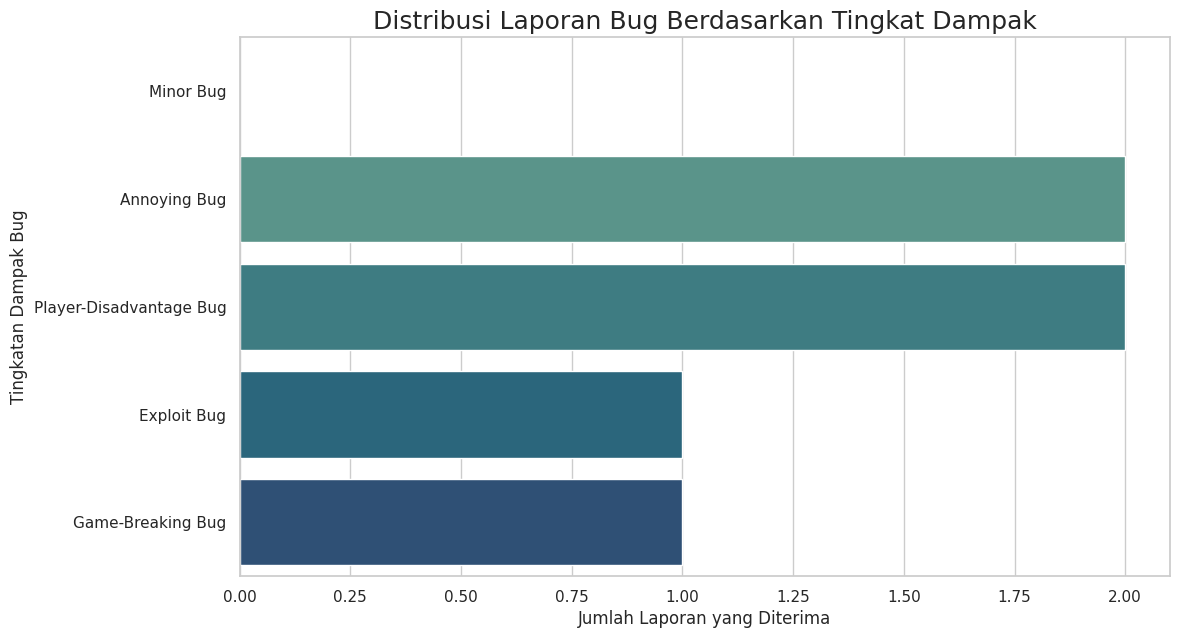

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

contoh_data = {
    'review_text': ['review 1', 'review 2', 'review 3', 'review 4', 'review 5', 'review 6'],
    'verdict': [
        'Player-Disadvantage Bug',
        'Annoying Bug',
        'Player-Disadvantage Bug',
        'Game-Breaking Bug',
        'Annoying Bug',
        'Exploit Bug'
    ]
}
df = pd.DataFrame(contoh_data)

bug_counts = df['verdict'].value_counts().reset_index()
bug_counts.columns = ['Tingkatan Bug', 'Jumlah Laporan']

order = ['Minor Bug', 'Annoying Bug', 'Player-Disadvantage Bug', 'Exploit Bug', 'Game-Breaking Bug']
bug_counts['Tingkatan Bug'] = pd.Categorical(bug_counts['Tingkatan Bug'], categories=order, ordered=True)
bug_counts = bug_counts.sort_values('Tingkatan Bug')

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

barplot = sns.barplot(
    data=bug_counts,
    x='Jumlah Laporan',
    y='Tingkatan Bug',
    palette='crest'
)

plt.title('Distribusi Laporan Bug Berdasarkan Tingkat Dampak', fontsize=18)
plt.xlabel('Jumlah Laporan yang Diterima', fontsize=12)
plt.ylabel('Tingkatan Dampak Bug', fontsize=12)

plt.show()
